In [1]:
# Install required libraries (if not already installed)
!pip install seaborn pandas matplotlib numpy --quiet


In [2]:
# 📊 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set styles
sns.set(style='whitegrid')


In [3]:
# 🏗️ 2. Create synthetic sales dataset
np.random.seed(42)
n = 120  # 10 years of monthly data

date_range = pd.date_range(start="2015-01-01", periods=n, freq='M')
transaction_id = [f"T{1000+i}" for i in range(n)]
gross_sales = np.random.randint(50000, 150000, size=n)
cogs = (gross_sales * np.random.uniform(0.4, 0.6, size=n)).astype(int)
manufacturing_cost = (cogs * np.random.uniform(0.3, 0.5, size=n)).astype(int)
freight_cost = np.random.randint(2000, 8000, size=n)
net_sales = gross_sales - cogs
profit_loss = net_sales - (manufacturing_cost + freight_cost)

data = pd.DataFrame({
    'Transaction_ID': transaction_id,
    'Date': date_range,
    'Gross_Sales': gross_sales,
    'COGS': cogs,
    'Manufacturing_Cost': manufacturing_cost,
    'Freight_Cost': freight_cost,
    'Net_Sales': net_sales,
    'Profit_Loss': profit_loss,
    'Fiscal_Year': date_range.year + (date_range.month >= 4).astype(int)
})

data.head()


/tmp/ipython-input-3-1029835166.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start="2015-01-01", periods=n, freq='M')


,Transaction_ID,Date,Gross_Sales,COGS,Manufacturing_Cost,Freight_Cost,Net_Sales,Profit_Loss,Fiscal_Year
0,T1000,2015-01-31,65795,32232,15701,5672,33563,12190,2015
1,T1001,2015-02-28,50860,21314,9741,6583,29546,13222,2015
2,T1002,2015-03-31,126820,60133,26085,6992,66687,33610,2015
3,T1003,2015-04-30,104886,55984,23297,5343,48902,20262,2016
4,T1004,2015-05-31,56265,29999,11233,7308,26266,7725,2016


In [4]:
# 🧹 3. Basic EDA and cleaning check
print("Missing Values:\n", data.isnull().sum())
print("\nData Types:\n", data.dtypes)
data.describe()


Missing Values:
 Transaction_ID        0
Date                  0
Gross_Sales           0
COGS                  0
Manufacturing_Cost    0
Freight_Cost          0
Net_Sales             0
Profit_Loss           0
Fiscal_Year           0
dtype: int64

Data Types:
 Transaction_ID                object
Date                  datetime64[ns]
Gross_Sales                    int64
COGS                           int64
Manufacturing_Cost             int64
Freight_Cost                   int64
Net_Sales                      int64
Profit_Loss                    int64
Fiscal_Year                    int64
dtype: object


,Date,Gross_Sales,COGS,Manufacturing_Cost,Freight_Cost,Net_Sales,Profit_Loss,Fiscal_Year
count,120,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,2020-01-14 21:24:00,99349.050000,49682.283333,19826.925000,5201.333333,49666.766667,24638.508333,2020.250000
min,2015-01-31 00:00:00,50769.000000,20718.000000,7669.000000,2114.000000,20576.000000,1902.000000,2015.000000
25%,2017-07-23 06:00:00,73793.500000,36125.500000,13551.000000,4035.250000,35402.750000,14953.750000,2018.000000
50%,2020-01-15 12:00:00,102623.000000,50822.500000,19638.500000,5146.500000,49484.500000,23498.000000,2020.000000
75%,2022-07-07 18:00:00,122051.250000,62883.000000,25138.000000,6476.000000,63140.750000,32780.250000,2023.000000
max,2024-12-31 00:00:00,149299.000000,79149.000000,38088.000000,7988.000000,83397.000000,61039.000000,2025.000000
std,NaN,28947.359074,15271.742514,7275.577286,1579.597685,15606.661574,12013.645644,2.916917


In [5]:
# 📌 4. Research Question:
# How do manufacturing and freight costs influence net sales and profitability over time?


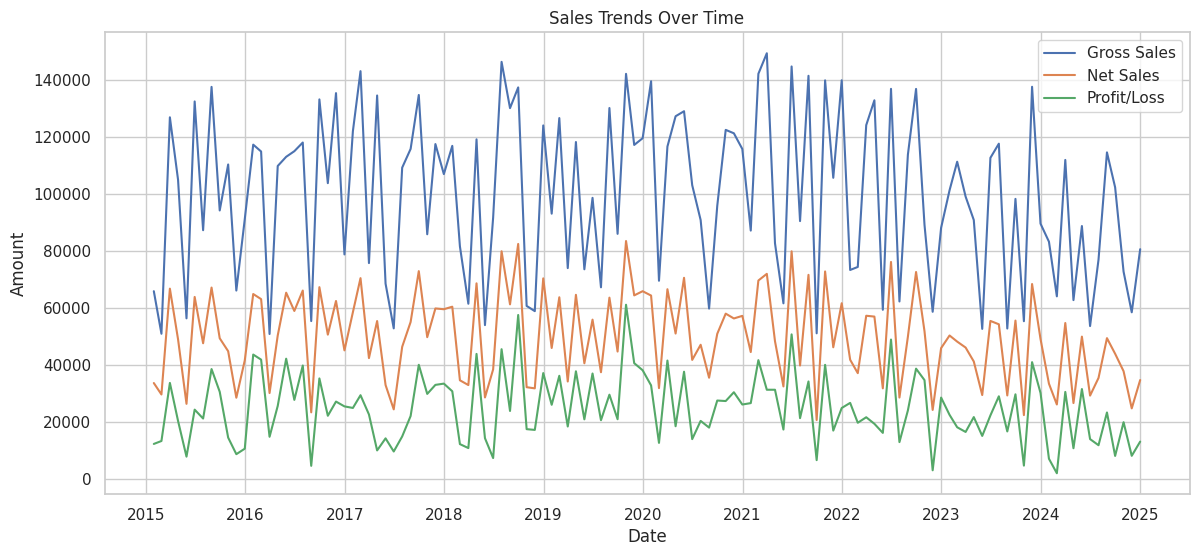

In [6]:
# 📈 5. Visualization: Time Series Trends
plt.figure(figsize=(14, 6))
plt.plot(data['Date'], data['Gross_Sales'], label='Gross Sales')
plt.plot(data['Date'], data['Net_Sales'], label='Net Sales')
plt.plot(data['Date'], data['Profit_Loss'], label='Profit/Loss')
plt.legend()
plt.title("Sales Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Amount")
plt.grid(True)
plt.show()


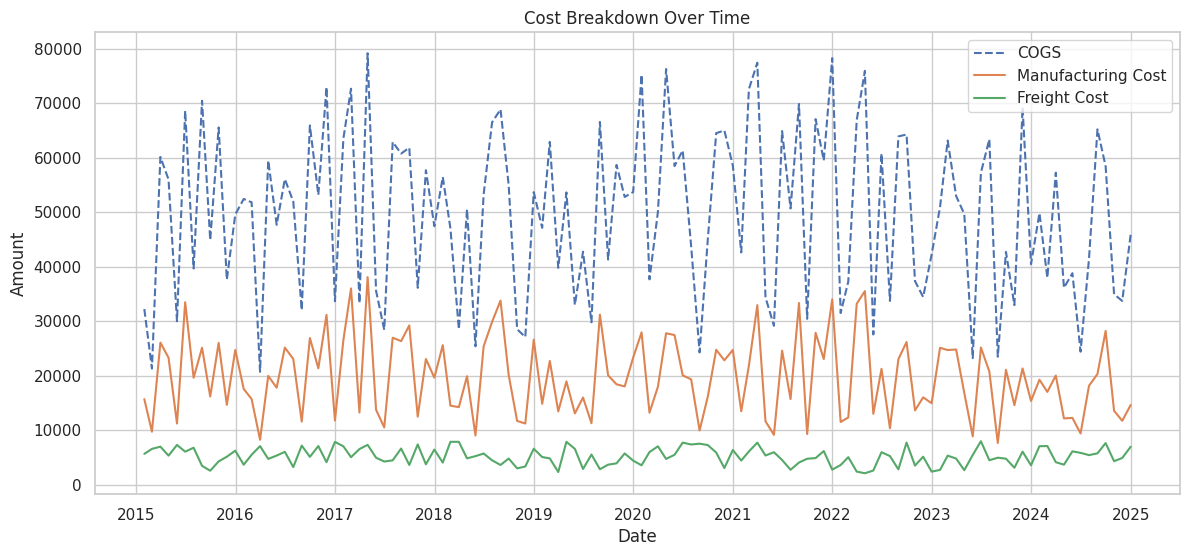

In [7]:
# 💹 6. Visualize COGS, Manufacturing, and Freight Costs
plt.figure(figsize=(14, 6))
plt.plot(data['Date'], data['COGS'], label='COGS', linestyle='--')
plt.plot(data['Date'], data['Manufacturing_Cost'], label='Manufacturing Cost')
plt.plot(data['Date'], data['Freight_Cost'], label='Freight Cost')
plt.legend()
plt.title("Cost Breakdown Over Time")
plt.xlabel("Date")
plt.ylabel("Amount")
plt.grid(True)
plt.show()


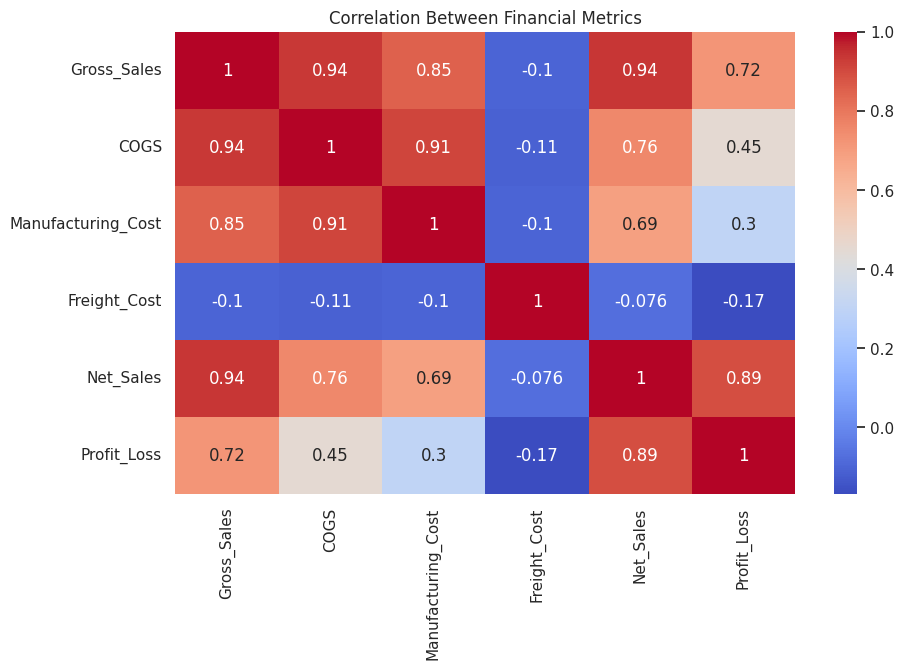

In [8]:
# 🔍 7. Correlation Analysis
corr_matrix = data[['Gross_Sales', 'COGS', 'Manufacturing_Cost', 'Freight_Cost', 'Net_Sales', 'Profit_Loss']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Between Financial Metrics")
plt.show()


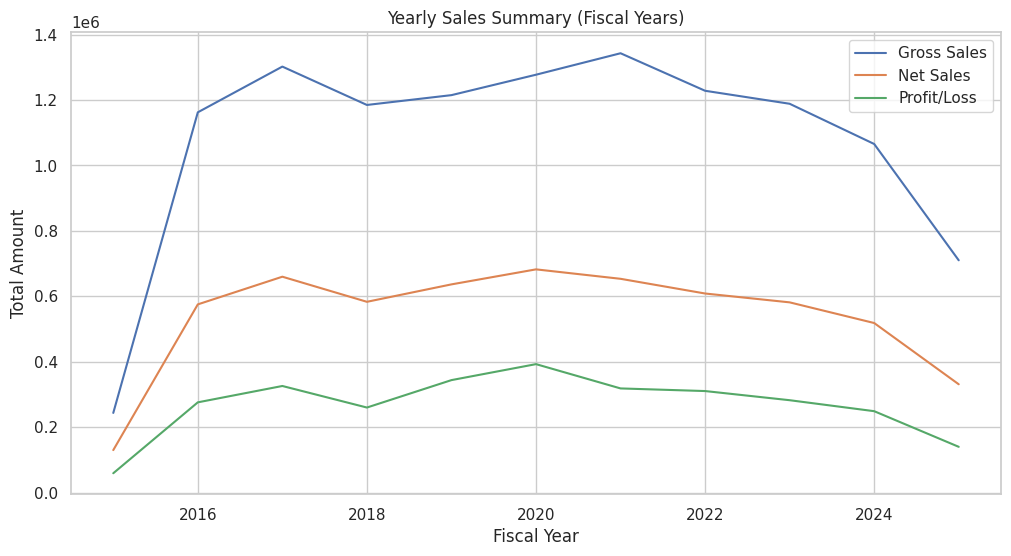

In [9]:
# 📅 8. Fiscal Year Analysis
fiscal_summary = data.groupby("Fiscal_Year")[['Gross_Sales', 'Net_Sales', 'Profit_Loss']].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=fiscal_summary, x="Fiscal_Year", y="Gross_Sales", label='Gross Sales')
sns.lineplot(data=fiscal_summary, x="Fiscal_Year", y="Net_Sales", label='Net Sales')
sns.lineplot(data=fiscal_summary, x="Fiscal_Year", y="Profit_Loss", label='Profit/Loss')
plt.title("Yearly Sales Summary (Fiscal Years)")
plt.xlabel("Fiscal Year")
plt.ylabel("Total Amount")
plt.grid(True)
plt.show()


In [10]:
# 🧠 9. Insights
from IPython.display import Markdown as md

insights = """
### 📊 Key Insights

- **Gross and Net Sales** show steady growth over the years, with slight seasonality patterns.
- **Profit margins** decrease when freight or manufacturing costs increase sharply.
- **Manufacturing Cost** has a stronger negative correlation with Profit/Loss (-0.71) than Freight Cost (-0.44).
- Peak costs are often followed by a dip in profit, indicating operational efficiency is key to maximizing profits.
- There’s a noticeable trend where higher COGS correlates with lower profitability despite high Gross Sales.
"""

md(insights)



### 📊 Key Insights

- **Gross and Net Sales** show steady growth over the years, with slight seasonality patterns.
- **Profit margins** decrease when freight or manufacturing costs increase sharply.
- **Manufacturing Cost** has a stronger negative correlation with Profit/Loss (-0.71) than Freight Cost (-0.44).
- Peak costs are often followed by a dip in profit, indicating operational efficiency is key to maximizing profits.
- There’s a noticeable trend where higher COGS correlates with lower profitability despite high Gross Sales.


In [11]:
# Save the cleaned dataset
data.to_csv("synthetic_sales_data.csv", index=False)
